### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Методы машинного обучения

##### Студент:  Кузнецов Юрий Владимирович
##### Группа:   НФИ 01-20

## Москва 2023
***

### Вариант № 7

1. Набор данных: symmetric_solids

2. Диапазон классов: 5-7

3. Архитектура нейросети: MLP

4. Показатель качества: cреднее квадратичное процентное отклонение (MSPE) для ошибки реконструкции

### Задание

1. Загрузите заданный в индивидуальном задании набор данных с изображениями из Tensorflow Datasets с разбиением на обучающую и тестовую выборки. Оставьте в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании. Если изображения цветные (с тремя каналами), то перекодируйте их в одноцветные (оттенки серого).
2. Создайте и обучите на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании. Визуализируйте несколько исходных и восстановленных автокодировщиком изображений.
3. Оцените качество модели автокодировщика на тестовой выборке по показателю, указанному в индивидуальном задании.
4. Оставьте в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми. Визуализируйте набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду для классов набора данных.
5. Выполните бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оцените долю верных ответов (accuracy) для двух построенных классификаторов
6. Визуализируйте ROC-кривые для построенных классификаторов на одном рисунке (с легендой) (Указание: используйте метод predict_proba() класса KNeighborsClassifier).
7. Визуализируйте границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков задайте средние/медианные значения).
8. Определите на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведите для этого изображения первоначальное и реконструированное изображения.

Импортируем нужные библиотеки

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

Загрузим набор svhn_cropped (symmetric_solids весит 3 Gb и адекватно с ним рабоотать не получилось) и разобьем на обучающую и тестовую выборки

In [ ]:
with tf.device("/cpu:0"):
    ds = ds_train = tfds.load("svhn_cropped", split=['train[:50%]', 'test[:50%]'])
    df_train = pd.DataFrame(tfds.as_dataframe(ds[0]))
    df_test = pd.DataFrame(tfds.as_dataframe(ds[1]))
df_train.shape, df_test.shape

((36628, 2), (13016, 2))

In [ ]:
df_train.head()

,image,label
0,"[[[126, 138, 136], [128, 138, 137], [129, 139,...",4
1,"[[[78, 86, 105], [80, 87, 107], [78, 85, 106],...",8
2,"[[[66, 65, 65], [72, 73, 72], [76, 77, 77], [8...",7
3,"[[[85, 83, 96], [68, 66, 80], [58, 56, 75], [5...",2
4,"[[[186, 191, 185], [186, 192, 185], [186, 193,...",6


Оставим в обучающей и тестовой выборках диапазон классов, указанных в индивидуальном задании (5-7):

In [ ]:
df_train_3 = df_train[(df_train['label'] == 5) | \
                              (df_train['label'] == 6) | \
                              (df_train['label'] == 7)]

df_train_3['label'].unique()

array([7, 6, 5])

Перекодируем цветные изображения в одноцветные:

In [ ]:
df_train_3.head()

,image,label
2,"[[[66, 65, 65], [72, 73, 72], [76, 77, 77], [8...",7
4,"[[[186, 191, 185], [186, 192, 185], [186, 193,...",6
8,"[[[173, 178, 182], [173, 178, 182], [173, 178,...",5
12,"[[[60, 65, 71], [62, 65, 70], [65, 68, 73], [6...",7
16,"[[[147, 143, 157], [147, 143, 157], [149, 145,...",7


In [ ]:
df_train_3.iloc[0]['image'].shape

(32, 32, 3)

In [ ]:
def convert(image):
    return np.expand_dims(np.dot(image[...,:3], [0.299, 0.587, 0.114]) / 255, axis=-1)

In [ ]:
df_train_3['image'] = df_train_3['image'].apply(convert)

<ipython-input-8-2cbad77eee88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_3['image'] = df_train_3['image'].apply(convert)


Проверим изображения:

In [ ]:
from PIL import Image

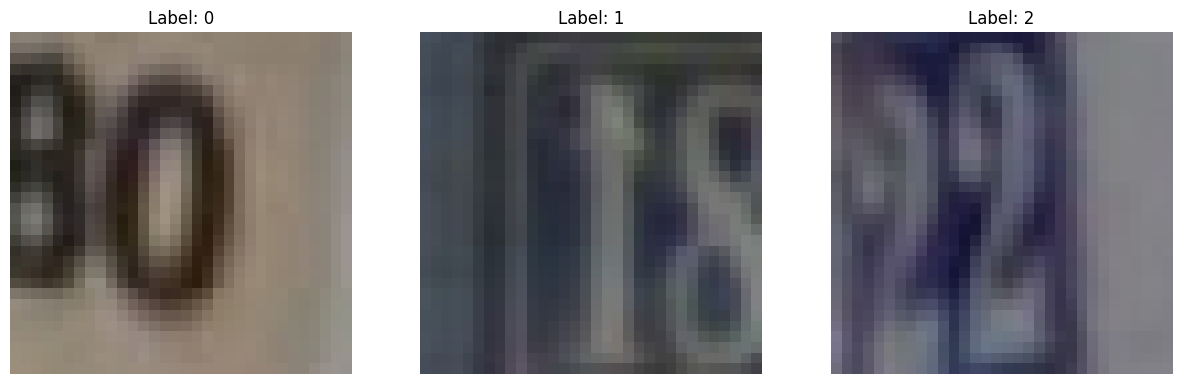

In [ ]:
f = plt.figure(figsize = (15, 15))
count = 1
for i in range(0, len(df_train_3['label'].unique())):
    plt.subplot(1, 3, count)
    count = count + 1
    plt.subplots_adjust(hspace = 0.5)
    plt.title('Label: ' + str(i))
    some_digit_image = df_train[(df_train['label'] == i)].iloc[0]['image']
    plt.imshow(some_digit_image)
    plt.axis('off')
    pass

Создадим и обучим на обучающей выборке автокодировщик архитектуры, указанной в индивидуальном задании (MLP):

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
hidden_dim = 16
p_size = 32

In [ ]:
input_img = Input((p_size, p_size, 1))
x = Flatten(name='flatten')(input_img)
x = Dense(128, activation='relu')(x)
x = Dense(128, activation='relu')(x)
encoded = Dense(hidden_dim, activation='relu', name='encoded')(x)

input_dec = Input(shape=(hidden_dim,), name='input_dec')
d = Dense(64, activation='relu', name='d1')(input_dec)
d = Dense(p_size * p_size, activation='sigmoid', name='d2')(d)
decoded = Reshape((p_size, p_size, 1), name='decoded')(d)


encoder_1 = keras.Model(input_img, encoded)
decoder_1 = keras.Model(input_dec, decoded)

autoencoder_1 = keras.Model(input_img, decoder_1(encoder_1(input_img)))
autoencoder_1.compile(optimizer=Adam(), loss='binary_crossentropy')

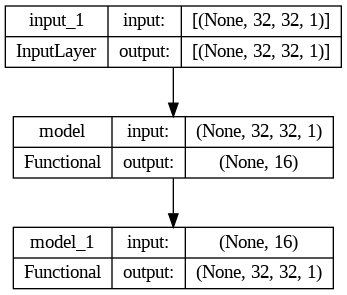

In [ ]:
keras.utils.plot_model(autoencoder_1, show_shapes=True)

In [ ]:
x_train_3 = np.stack(df_train_3['image'].to_list())
x_train_3.shape

(9074, 32, 32, 1)

In [ ]:
history_1 = autoencoder_1.fit(x_train_3, x_train_3,
                              epochs=30,
                              batch_size=64,
                              shuffle=True,
                              verbose=1
                             )

Epoch 1/30
142/142 [==============================] - 2s 7ms/step - loss: 0.6724
Epoch 2/30
142/142 [==============================] - 1s 7ms/step - loss: 0.6314
Epoch 3/30
142/142 [==============================] - 1s 7ms/step - loss: 0.6271
Epoch 4/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6265
Epoch 5/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6252
Epoch 6/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6250
Epoch 7/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6248
Epoch 8/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6247
Epoch 9/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6241
Epoch 10/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6237
Epoch 11/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6232
Epoch 12/30
142/142 [==============================] - 1s 5ms/step - loss: 0.6224
Epoch 13/30
142/142 [====

In [ ]:
encoded_imgs_1 = encoder_1.predict(x_train_3)
decoded_imgs_1 = decoder_1.predict(encoded_imgs_1)

284/284 [==============================] - 0s 1ms/step


In [ ]:
def image_show(orig_imgs, dec_imgs, fname=None):
    n = 10  # кол-во изображений
    fig = plt.figure(figsize=(20, 4))
    for i in range(n):
        # исходные изображения
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(orig_imgs[i].reshape(32, 32))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # реконструированные изображения
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(dec_imgs[i].reshape(32, 32))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()

    if fname:
        fig.savefig(fname)

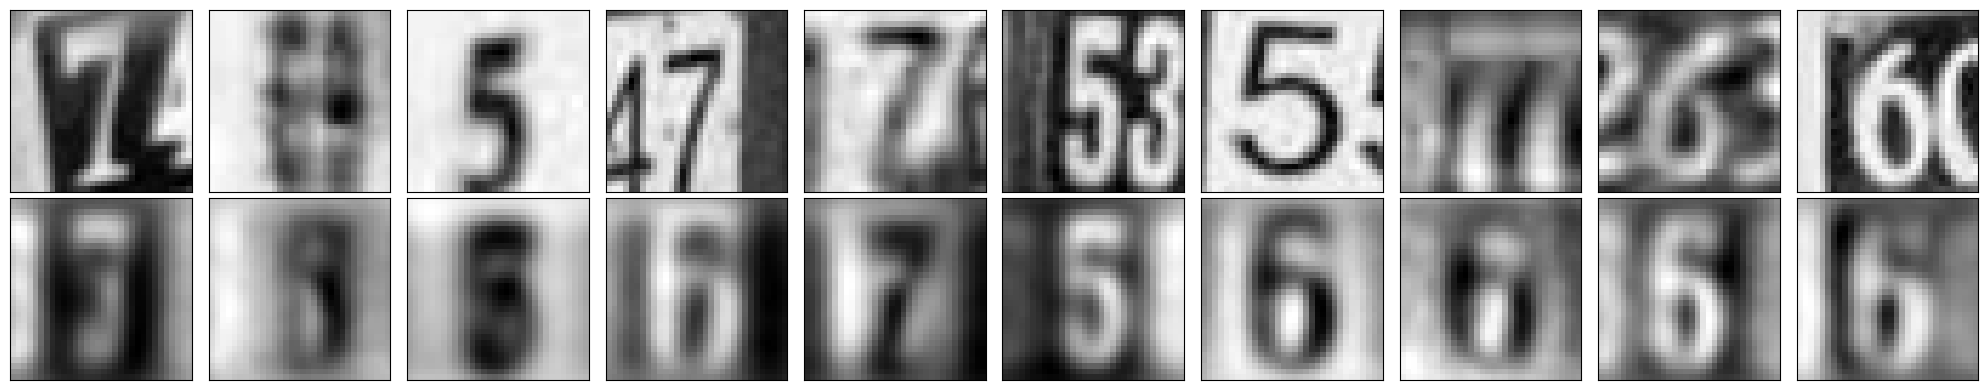

In [ ]:
image_show(x_train_3, decoded_imgs_1)

Оценим качество модели автокодировщика на тестовой выборке по показателю MSPE

In [ ]:
x_train_3.shape

(9074, 32, 32, 1)

In [ ]:
x_train_3_flatten = x_train_3.reshape(x_train_3.shape[0], \
                                    x_train_3.shape[1] * x_train_3.shape[2])
x_train_3_flatten.shape

(9074, 1024)

In [ ]:
decoded_imgs_1.shape

(9074, 32, 32, 1)

In [ ]:
decoded_imgs_1_flatten = decoded_imgs_1.reshape(decoded_imgs_1.shape[0], \
                               decoded_imgs_1.shape[1] * decoded_imgs_1.shape[2])
decoded_imgs_1_flatten.shape

(9074, 1024)

In [ ]:
mspe = np.mean(np.square((x_train_3_flatten - decoded_imgs_1_flatten) / x_train_3_flatten)) * 100

<ipython-input-24-80d8b3577917>:1: RuntimeWarning: divide by zero encountered in true_divide
  mspe = np.mean(np.square((x_train_3_flatten - decoded_imgs_1_flatten) / x_train_3_flatten)) * 100


In [ ]:
print(f"MSPE на тестовом наборе: {mspe:.2f}%")

MSPE на тестовом наборе: inf%


Оставим в наборах изображения первых двух классов диапазона, указанного в индивидуальном задании первыми (5, 6):

In [ ]:
df_train_2 = df_train_3[df_train_3['label'] != 7]
df_train_2['label'].unique()

array([6, 5])

Визуализируем набор данных на плоскости, соответствующей двум первым латентным признакам, отображая точки различных классов разными цветами. Подпишем оси и рисунок, создайте легенду для классов набора данных:

In [ ]:
x_train_2 = np.stack(df_train_2['image'].to_list())

In [ ]:
encoded_imgs_2 = encoder_1.predict(x_train_2)

196/196 [==============================] - 0s 1ms/step


In [ ]:
encoded_imgs_2.shape

(6263, 16)

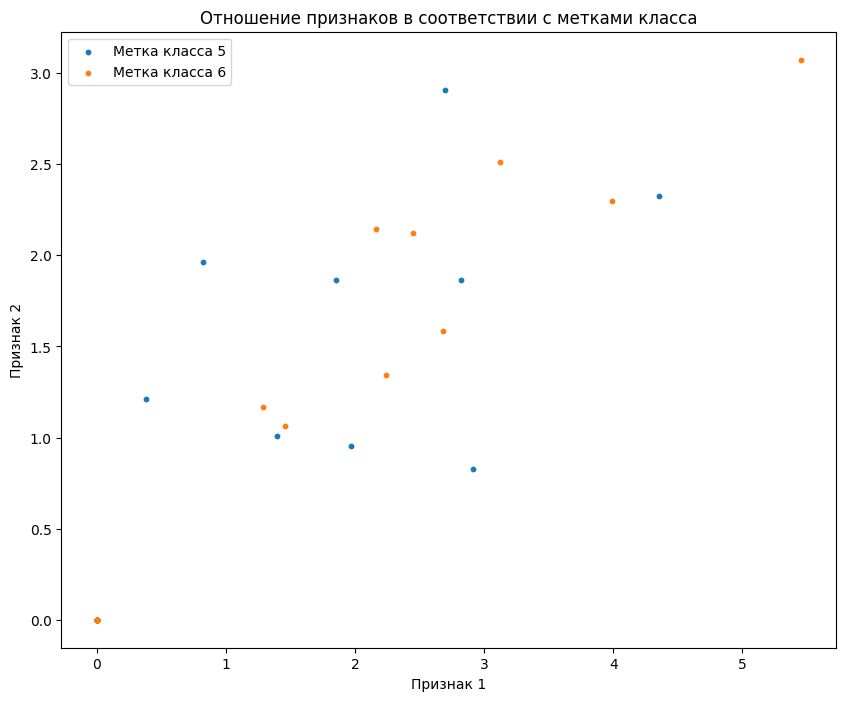

In [ ]:
plt.figure(figsize=(10, 8))
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Отношение признаков в соответствии с метками класса')

df_train_2.reset_index(inplace=True)
for label_number in range(5, 7):
    current_indexes = df_train_2.index[df_train_2['label'] == label_number].tolist()
    plt.scatter(encoded_imgs_2[current_indexes][0], encoded_imgs_2[current_indexes][1], \
                label='Метка класса ' + str(label_number), s=10)

plt.legend()
plt.plot()
plt.show()

Выполним бинарную классификацию изображений по латентным (скрытым) признакам и всем признакам при помощи классификатора метода ближайших соседей (kNN). Оценим долю верных ответов (accuracy) для двух построенных классификаторов:

In [ ]:
encoded_imgs_2.shape

(6263, 16)

In [ ]:
(df_train_2['label'] - 5).to_numpy()

array([1, 0, 0, ..., 0, 0, 1])

In [ ]:
import time

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

start = time.time()

knn1 = KNeighborsClassifier(n_neighbors=15).fit(encoded_imgs_2, (df_train_2['label'] - 5).to_numpy())

accuracy = knn1.score(encoded_imgs_2, (df_train_2['label'] - 5).to_numpy())
print(accuracy)

end = time.time()
print("Время работы",end - start,"сек.")

0.6982276864122625
Время работы 0.27591705322265625 сек.


In [ ]:
x_train_2_flatten = x_train_2.reshape(x_train_2.shape[0], \
                                    x_train_2.shape[1] * x_train_2.shape[2])

In [ ]:
start = time.time()

knn2 = KNeighborsClassifier(n_neighbors=15).fit(x_train_2_flatten, (df_train_2['label'] - 5).to_numpy())

accuracy = knn2.score(x_train_2_flatten, (df_train_2['label'] - 5).to_numpy())
print(accuracy)

end = time.time()
print("Время работы",end - start,"sec.")

0.7914737346319655
Время работы 2.6599581241607666 sec.


Точность knn по вектору скрытых состояний немного хуже точности knn по всему изображению, но для обоих моделей точность достаточно высока

Визуализируем ROC-кривые для построенных классификаторов на одном рисунке (с легендой):

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

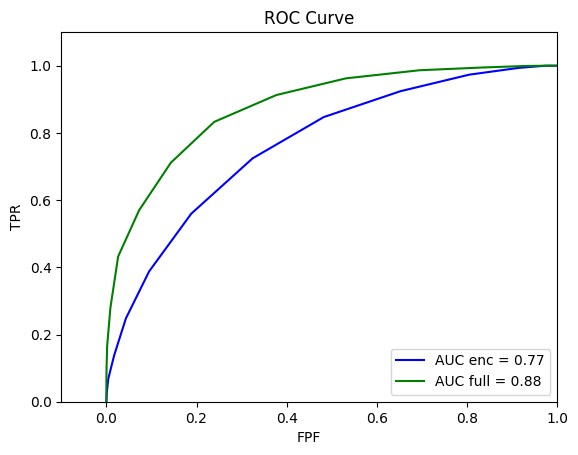

In [ ]:
y_scores_1 = knn1.predict_proba(encoded_imgs_2)
fpr1, tpr1, threshold1 = roc_curve((df_train_2['label'] - 5).to_numpy(), y_scores_1[:, 1])
roc_auc_1 = auc(fpr1, tpr1)

y_scores_2 = knn2.predict_proba(x_train_2_flatten)
fpr2, tpr2, threshold2 = roc_curve((df_train_2['label'] - 5).to_numpy(), y_scores_2[:, 1])
roc_auc_2 = auc(fpr2, tpr2)


plt.plot(fpr1, tpr1, 'b-', label = 'AUC enc = %0.2f' % roc_auc_1)
plt.plot(fpr2, tpr2, 'g-', label = 'AUC full = %0.2f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.xlim([-0.1, 1])
plt.ylim([0, 1.1])
plt.ylabel('TPR')
plt.xlabel('FPF')
plt.title('ROC Curve')
plt.show()

Визуализируем границы принятия решений классификатора kNN для латентных признаков на плоскости, соответствующей двум первым латентным признакам (для прочих латентных признаков зададим средние значения):

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
ff_values = {i:np.mean(encoded_imgs_2[:, i]) for i in range(2, encoded_imgs_2.shape[1])}
ff_ranges = {i: 0.75 for i in range(2, encoded_imgs_2.shape[1])}

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


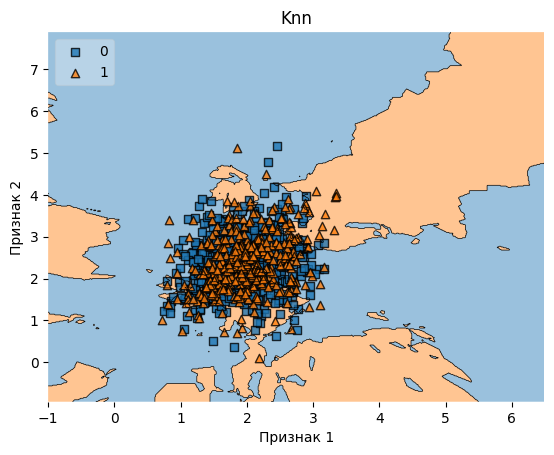

In [ ]:
plot_decision_regions(encoded_imgs_2, (df_train_2['label'] - 5).to_numpy(), clf=knn1, legend=2,\
                      #feature_index=[0, 1],
                      filler_feature_values=ff_values,
                      filler_feature_ranges=ff_ranges)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Knn')
plt.show()

Определим на первоначальной тестовой выборке изображение, имеющее наибольшую ошибку реконструкции. Выведим для этого изображения первоначальное и реконструированное изображения

In [ ]:
max_mspe = np.argmax(mspe)

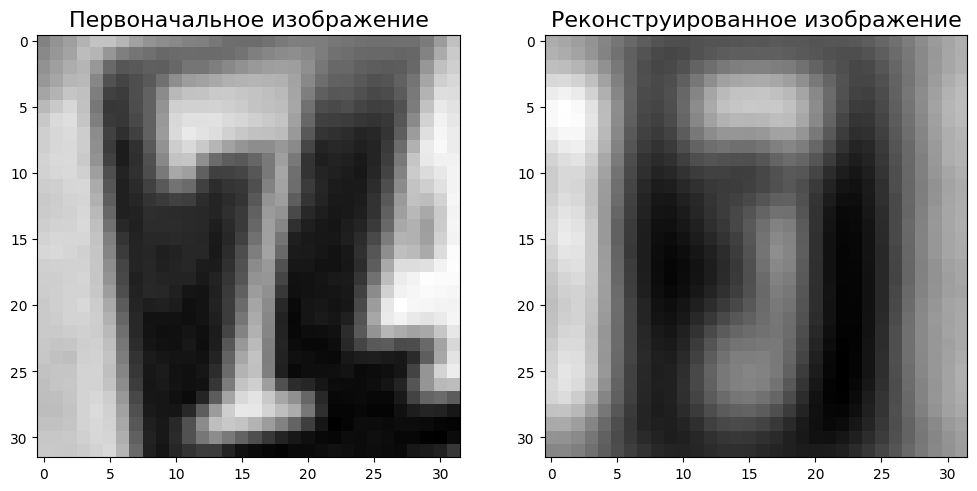

In [ ]:
fig = plt.figure(figsize = (12, 6))

ax = fig.add_subplot(1, 2, 1)
plt.title('Первоначальное изображение', fontsize = 16)
plt.imshow(x_train_3[max_mspe])

ax = fig.add_subplot(1, 2, 2)
plt.title('Реконструированное изображение', fontsize = 16)
plt.imshow(decoded_imgs_1[max_mspe])